# Mapping surface height dynamics to flow physics in free-surface turbulent flow - Code tutorial

# Loading packages

In [1]:
import numpy as np
import processdata3 as processdata         #this file contains all function for the processing, including how to run SHRED, calculate error metrics
import plot_results3 as plot_results     #file with plotting functions
import utilities3 as utilities       #file with different utility functions
import models           #file includes the SHRED model


# Data compression

As highlighted in the paper, in particular Section III A, we use the Singular Value Decomposition (SVD) to decompose the surface and velocity fields and work in the compressed space in the reconstruction. 


In the following cell, we calculate the SVD modes and store the **U**, **S** and **V** matrices in files. 

In [ ]:
#calculate and save SVD matrices


#TODO: fix file name/address dependency in code
#PROBLEM: cannot really load full velocity field to github

utilities.save_svd_full(eta_fluc, u_fluc, ens, case, variable, forecast=False, DNS=False, DNS_plane=None, DNS_surf=False, DNS_case='RE2500', new_teetank=False,)

#save all singular values for usage
utilities.save_singular_values_full(DNS_case, DNS_plane)

### Compressing DNS Case S2


In the following cell, we execute the function for calculating certain SVD modes, the singular value profile and turbulent spectra for different ranks, to reproduce Figs. 3 and 4 in the paper. 

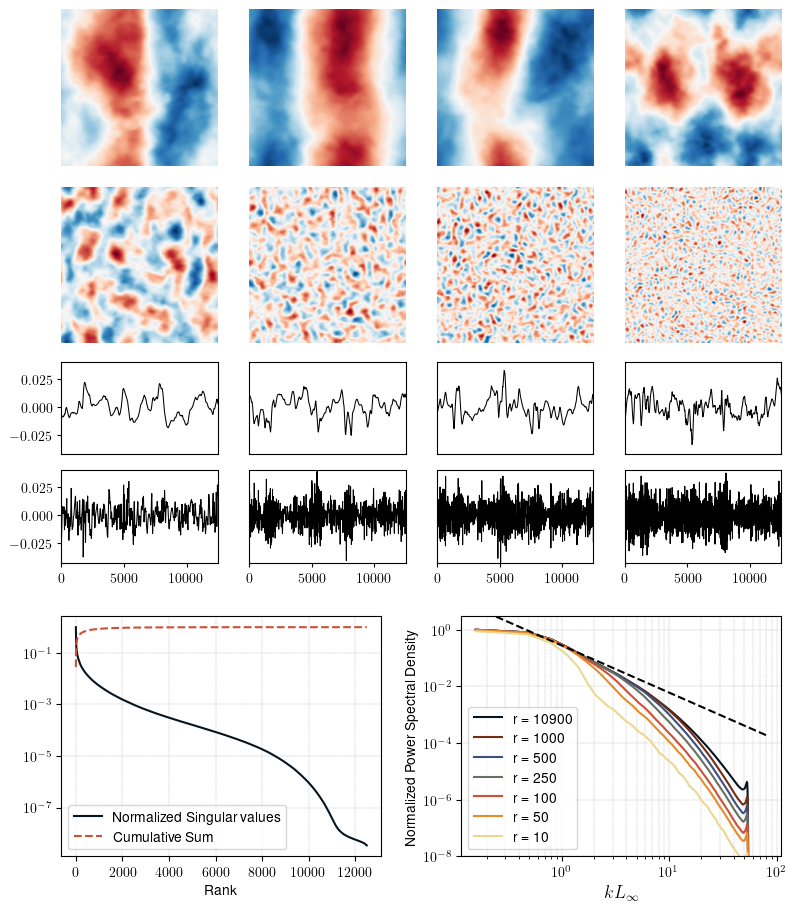

In [3]:
case='S2'                       
plane=1                                 #horizontal plane of choice -- for case S1: planes between [1, 57], for S2: [1,76]
rank_list=[10900,1000,500,250,100,50,10] #list of ranks for the spectral plot
labels=rank_list                        #make string labels for the ranks for the spectral plot
mode_list = [0,1,2,9,49,249,499,999]    #list of rank modes for the plots of U and V modes


plot_results.plot_svd_and_spectra_DNS(case,plane, rank_list, mode_list, labels)

### Compressing Experimental Case E2

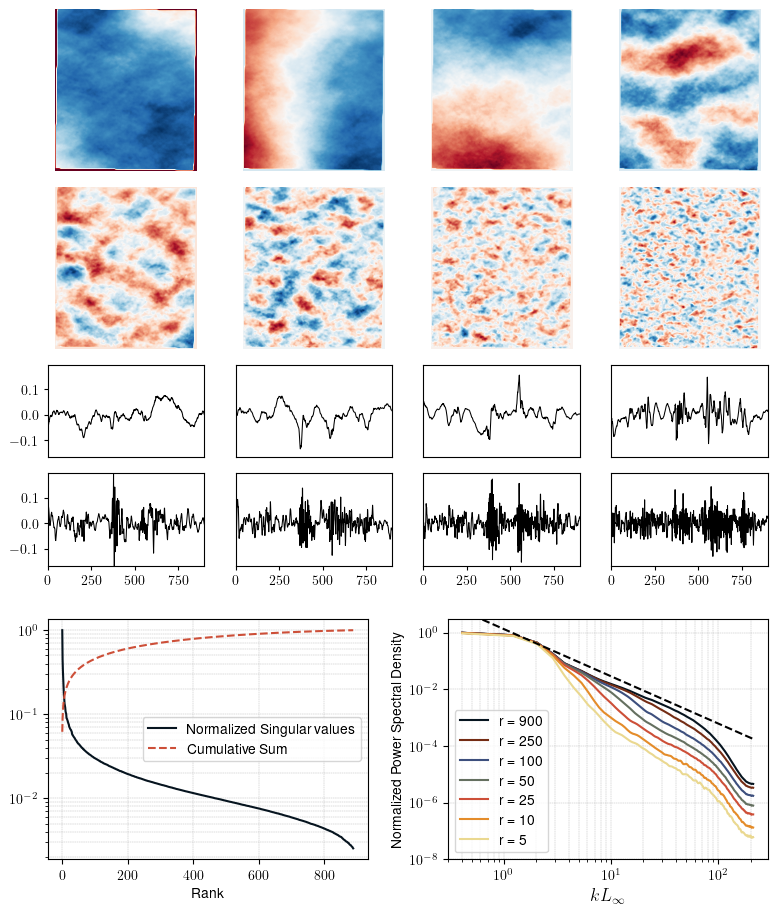

In [2]:
case='E2'
plane=3
rank_list = [900,250,100,50,25,10,5]
labels=rank_list
mode_list=[0,1,2,9,24,49,99,249]
ensembles=[5]

plot_results.plot_svd_and_spectra_exp(case,plane, rank_list, mode_list, labels, ensembles)

## **Run SHRED**

When executing SHRED, we decide how many planes to feed in, what case to run for, what rank compression we apply to the input, how many sensor to use and how many SHRED ensemble runs we want. 

### SHRED DNS CASE S2

Here we run SHRED for only two planes (plane 10, roughly $0.2 L_{\infty}$ deep, and plane 70 roughly $1.8 L_{\infty} deep$). We run only one ensemble for this test case

(65536, 12500)
rank:  250 
 SHRED ensemble:  100
sensor_loc:  [40800 49670 46552]
test:  [   10    24    27 ... 12436 12440 12443]
Training epoch 1
Error tensor(0.2637, device='cuda:0')
Training epoch 20
Error tensor(0.2592, device='cuda:0')
Training epoch 40
Error tensor(0.2390, device='cuda:0')
Training epoch 60
Error tensor(0.2059, device='cuda:0')
Training epoch 80
Error tensor(0.1784, device='cuda:0')
Training epoch 100
Error tensor(0.1627, device='cuda:0')
Training epoch 120
Error tensor(0.1558, device='cuda:0')
Training epoch 140
Error tensor(0.1486, device='cuda:0')
Training epoch 160
Error tensor(0.1443, device='cuda:0')
Training epoch 180
Error tensor(0.1429, device='cuda:0')
Training epoch 200
Error tensor(0.1418, device='cuda:0')
Training epoch 220
Error tensor(0.1400, device='cuda:0')
Training epoch 240
Error tensor(0.1397, device='cuda:0')
Training epoch 260
Error tensor(0.1391, device='cuda:0')
Training epoch 280
Error tensor(0.1398, device='cuda:0')
Training epoch 300
E

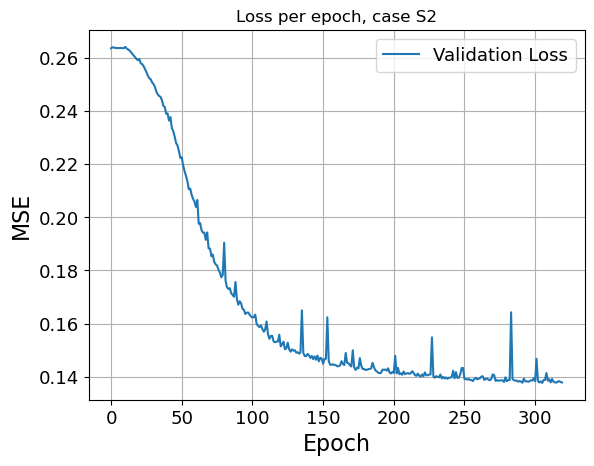

test error:  0.5383514


In [2]:
'''INPUT PARAMETERS'''
case='S2' 

full_planes=True                    #if all planes included, set this to True. 
vel_planes_selective = [10,70]      #else, we choose specific planes

num_sensors = 3   #number of sensors for surface measurement. Standard is 3.
ens_start=100 #start index for first SHRED ensemble (can be 0)
ens_end=100  #last index for SHRED ensemble
lags=52     #lags for the LSTM, standard is 52      
random_sampling=True    #if True, snapshots are randomly exctracted and separated to training, validation or testing 
                        #throughout the dataset. If False, a forecast is done (not fully functional as of now)


if case=='S1':
    vel_planes_all = np.arange(1,58)    #all planes for case S1
    r_vals = [225]                      #chosen rank for case S1
elif case=='S2':
    vel_planes_all = np.arange(1,77)    #all planes for case S2
    r_vals = [250]                      # chosen rank for case S2

if full_planes:
    vel_planes = vel_planes_all
else:
    vel_planes = vel_planes_selective


'''RUN ENSEMBLE OF SHRED'''
processdata.SHRED_ensemble_DNS(r_vals, num_sensors, ens_start, ens_end, vel_planes, 
                               lags, full_planes, random_sampling, case)

### SHRED Experimental case E2

(329400, 900)
rank:  100 
 SHRED ensemble:  100
sensor_loc:  [160083 168317 123732]
test indices:  [ 23  42  49  89 108 125 134 144 151 182 188 192 218 224 232 243 261 266
 272 279 294 305 308 325 335 343 361 381 398 407 419 440 454 466 481 493
 525 558 564 578 581 594 601 603 612 642 658 662 664 682 694 698 722 728
 730 752 761 766 774 781 794 799 827 845]
Training epoch 1
Error tensor(0.4689, device='cuda:0')
Training epoch 20
Error tensor(0.2715, device='cuda:0')
Training epoch 40
Error tensor(0.2716, device='cuda:0')
Training epoch 60
Error tensor(0.2716, device='cuda:0')
Training epoch 80
Error tensor(0.2709, device='cuda:0')
Training epoch 100
Error tensor(0.2706, device='cuda:0')
SHRED successfully done!


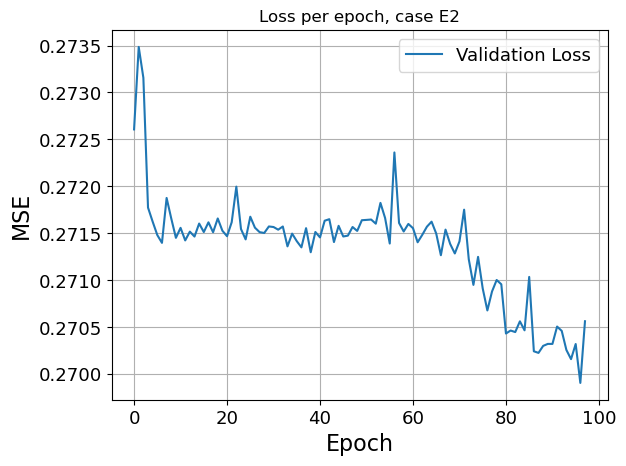

0.99250734


In [2]:
'''INPUT PARAMETERS'''

case = 'E2'

vel_planes = [2]
experimental_ens_list = [13]    #list of experimental ensembles to run for;
                                #NOTE: can be any from 1 to 20, except 4-10
r_vals = [100]    #chosen rank for cases E1 & E2 
num_sensors = 3 #number of sensors for surface measurement. Standard is 3.
ens_start=100   #start index for first SHRED ensemble (can be 0)
ens_end=100     #last index for SHRED ensemble
lags=52     #lags for the LSTM, standard is 52  
random_sampling=True    #if True, snapshots are randomly exctracted and separated to training, validation or testing 
                        #throughout the dataset. If False, a forecast is done (not fully functional as of now)


'''RUN ENSEMBLE OF SHRED'''
for k in range(len(vel_planes)):
    plane=vel_planes[k]
    planes = ['H395','H390', 'H375', 'H350', 'H300']
    exp_plane= planes[plane -1]
    
    for i in range(len(experimental_ens_list)):
        
        experimental_ens=experimental_ens_list[i]
        if experimental_ens > 10 or experimental_ens < 4:
            surf = utilities.get_normalized_surface_exp(case, plane, experimental_ens)

            processdata.SHRED_ensemble_exp(r_vals, num_sensors, surf, ens_start, ens_end, case, experimental_ens, lags, exp_plane=exp_plane, random_sampling=random_sampling)

# Plot and compare SHRED outputs

### Compare case S2

plane  10
getting test images
test images extracted
plane  70
getting test images
test images extracted


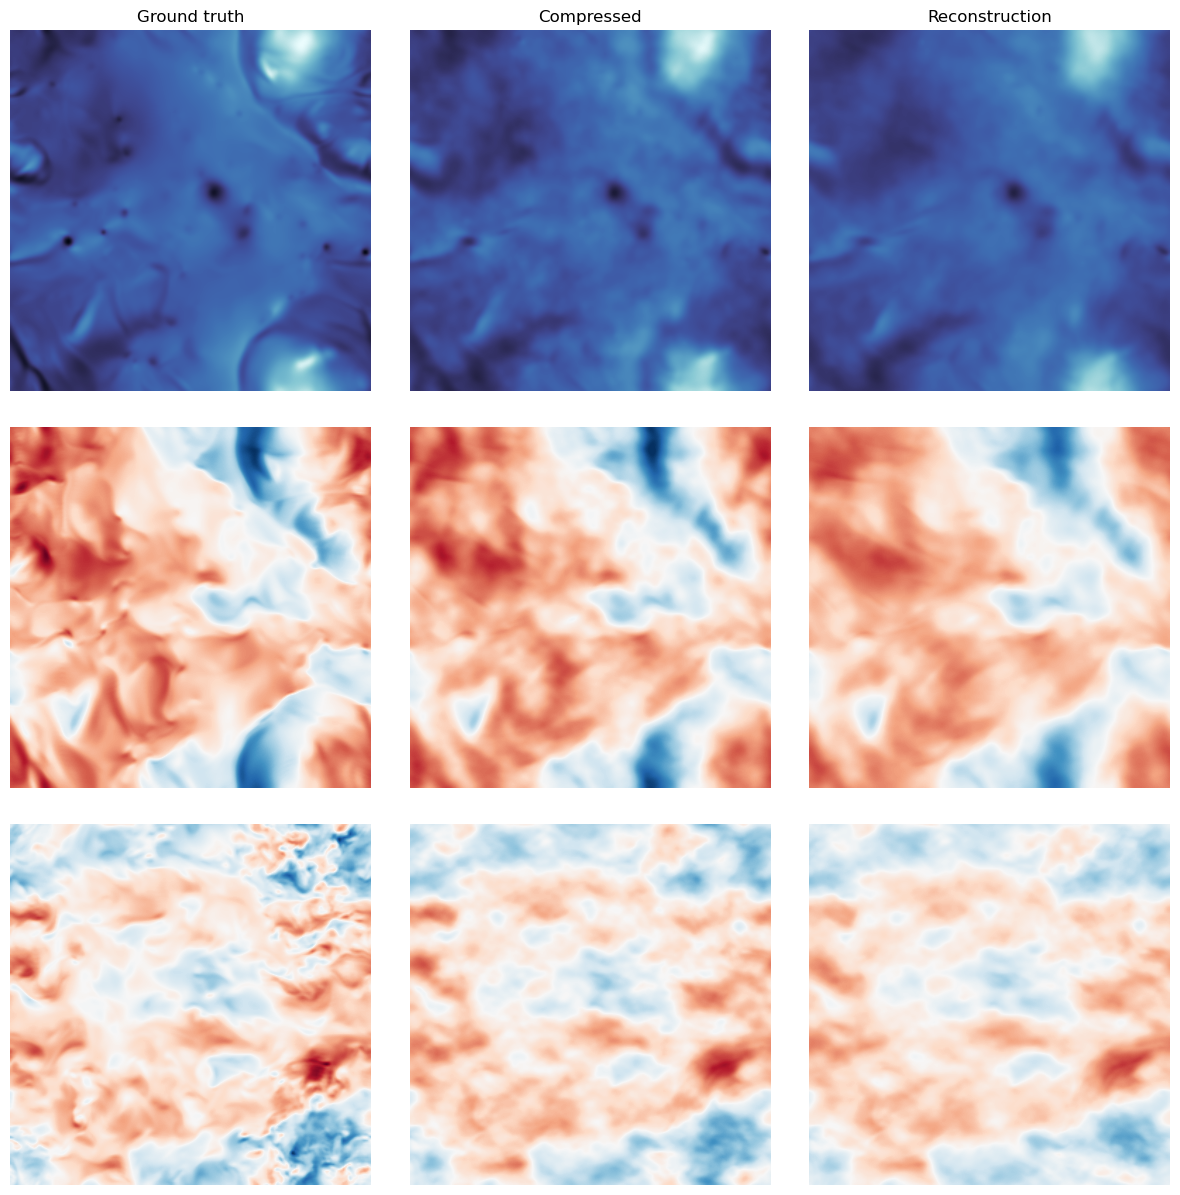

In [2]:

vel_planes = [10,70]#velocity planes to compare
rank = 250          #SVD rank used in the SHRED simulation
SHRED_ens=10        #what SHRED ensemble case to plot for
num_sensors=3       #standard is 3 sensors
test_snap_index=790 #what snapshot index in the testing data to plot
lags=52             #lags for the LSTM
forecast=False      #f the SHRED run is in forecast mode
add_surface=True    #if surface profile is to be included
full_planes=True    #if the SHRED run is coming from a full plane run, or specific planes only
case='S2'           #Simulation case


plot_results.plot_SHRED_comparison_DNS(rank, SHRED_ens, vel_planes, num_sensors, test_snap_index, 
                                        lags, forecast, add_surface, full_planes, case)

### Compare case E2

plane:  H390
load surface
getting test images
load velocity field, plane H390
test images extracted


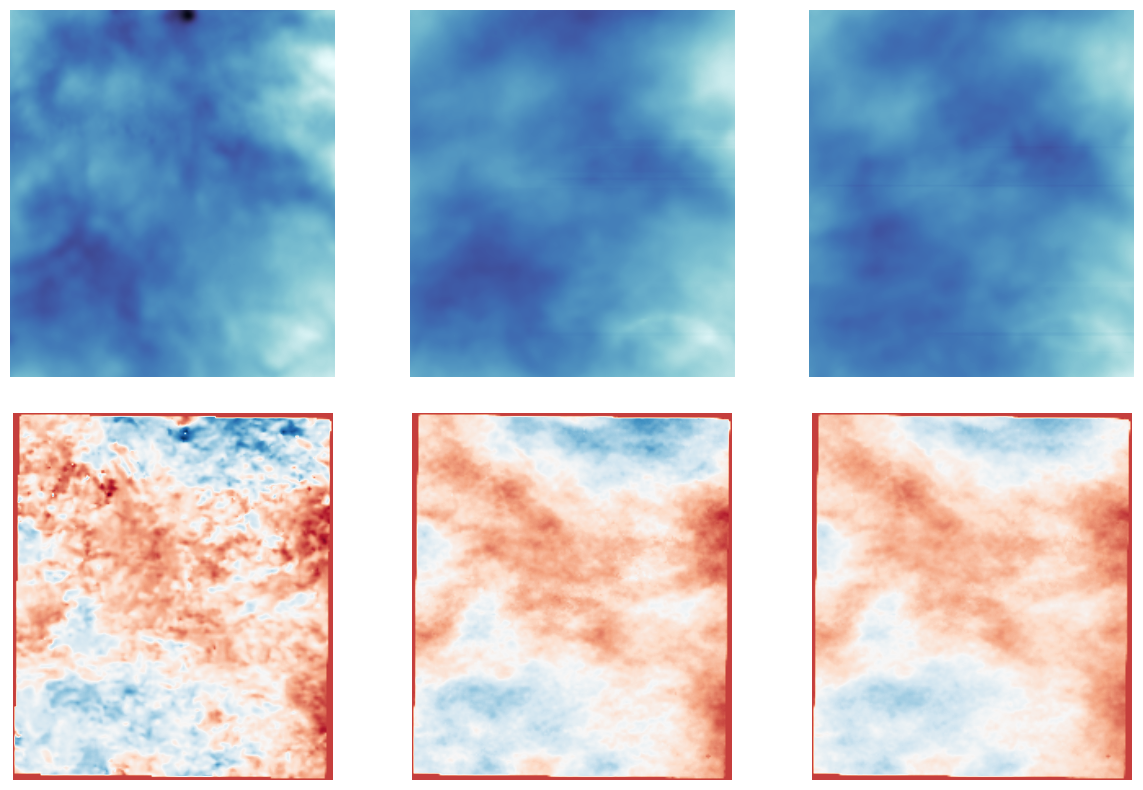

In [ ]:

rank = 100              #SVD rank value used in the compression fed into SHRED
SHRED_ens=36            #what SHRED ensemble index to plot for
num_sensors=3
test_snap_index=54      #what snapshot index in the testing data to plot
lags=52                 #lags for the LSTM, must be correct to shift the extracted test images correctly
forecast=False          
add_surface=True        #include surface in the plot
full_planes=True        #True if SHRED training comes from a set of all planes, or selected planes only  
exp_case='E2'           #E1 or E2
experimental_ens = 15   #list of experimental ensembles to run for;
                             #NOTE: can be any from 1 to 20, except 4-10
plane_list = [2]        #plane 1 doesn't exist, only planes 2 (closest to surface) to 5 (deepest)

plot_results.plot_SHRED_comparison_exp(rank, exp_case, experimental_ens, SHRED_ens, plane_list, test_snap_index,None, None, 
                              num_sensors, lags=52, forecast=False, add_surface=add_surface)


# Calculate error metrics

The following cell runs and saves error metrics (RMS, NMSE, PSDE, SSIM & PSNR) for the SHRED reconstructions of the DNS case S2 and experimental case E2. **Note:** these are NOT used to plot error metrics, only to calculate and save

#### DNS case S2

In [ ]:
#NOTE: these following variables are only determined based on what parameters are used in saved SHRED runs

SHRED_ensembles = np.arange(8,9)    #list of SHRED runs to calculate for
vel_planes=np.arange(1,77)          #list of velocity planes 
r_vals = [250]                      #list of ranks
num_sensors = 3                    #number of sensors
DNS_case='S2'   
lags=52
forecast=False                  
full_planes_SHRED=True #whether to open SHRED for full planes (True), or for specific run with chosen planes (False) as given by vel_planes
                        #If True, but vel_planes is fewer planes than full length of planes, then these selected planes are calculated



#loop for iterating rank values 
for r in range(len(r_vals)):
    rank = r_vals[r]
    
    processdata.calculate_error_metrics(DNS_case, rank, vel_planes, num_sensors, SHRED_ensembles, lags, forecast, full_planes_SHRED)

#NOTE for running rank dependence analysis (appendix A):
    #run with extended r_vals list of a range of ranks (their SHRED runs must be saved first)
    # full_planes=False, and only for selected vel_planes

#### Experimental case E2

In [ ]:
#NOTE: these following variables are only determined based on what parameters are used in saved SHRED runs
SHRED_ensembles = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
vel_planes=[2,3,4,5]
r_vals = [100]

num_sensors = 3
case='E2'
lags=52
forecast=False
full_planes_SHRED=False #whether to open SHRED for full planes (True), or for specific run with chosen planes (False) as given by vel_planes
                #If True, but vel_planes is fewer planes than full length of planes, then these selected planes are calculated

experimental_ens = [1,2,3, 11,12,13,14,15,16,17,18,19,20]

#loop for iterating rank values and sensor values
for r in range(len(r_vals)):
    rank = r_vals[r]

    processdata.calculate_error_metrics_exp(case, rank, vel_planes, num_sensors, SHRED_ensembles, experimental_ens, lags=52, forecast=False, full_planes=True)

Before running ensemble-averaged depth dependent error metric profiles, we also need to calculate the true RMS profiles of all four cases and save them. This is because it is used in the RMS plots. To do this, we can run these cells:

In [ ]:
dimT = 10900
DNS_case='S1'
vel_planes = np.arange(1,58)
rms_z_true = processdata.calc_RMS_profile_true(DNS_case, vel_planes, dimT)

dimT = 12500
DNS_case='S2'
vel_planes = np.arange(1,58)
rms_z_true = processdata.calc_RMS_profile_true(DNS_case, vel_planes, dimT)

dimT = 900
DNS_case='E1'
vel_planes = np.arange(2,6)
rms_z_true = processdata.calc_RMS_profile_true_exp(vel_planes, dimT, case, num_exp_ens=1)

dimT = 900
DNS_case='E2'
vel_planes = np.arange(2,6)
rms_z_true = processdata.calc_RMS_profile_true_exp(vel_planes, dimT, case, num_exp_ens=1)



# Plot ensemble-averaged depth-dependent error metric profiles

In the following cell, we plot the depth-dependent error metrics corresponding to Fig. 9 in paper. The vertical profiles of depth-dependent metrics such as Normalized Mean Squared Error (NMSE), Power Spectral Density Error (PSDE), Structural Similarity Index Measure (SSIM) and Peak Signal-to-Noise Ratio (PSNR) are plotted. These are averaged across a range of SHRED ensemble runs. 

0.5378227282848782
0.6388345417144542


c:\Users\krissmoe\OneDrive - NTNU\Documents\SHRED Paper 1 repo\SHRED-turbulence-sensing\plot_results3.py:1061: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


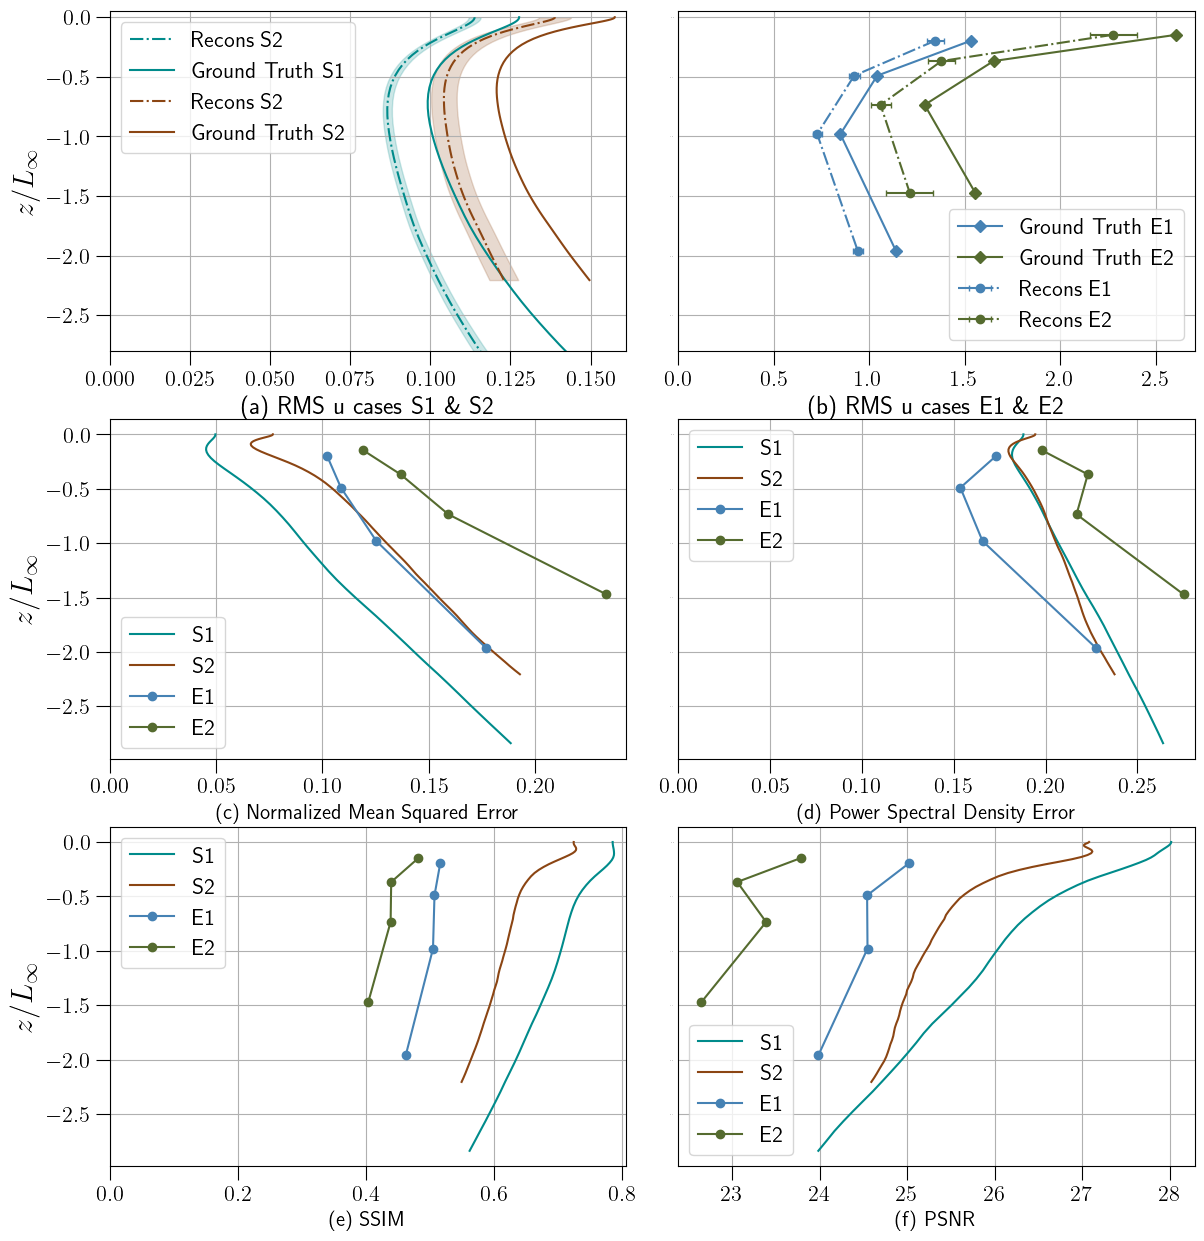

In [2]:

DNS_cases=['S1','S2']
exp_cases = ['E1', 'E2']


vel_planes_S1=np.arange(1,58)
vel_planes_S2=np.arange(1,77)
vel_planes_exp = [2,3,4,5]
full_planes_exp = True
full_planes=True
full_planes_error_basis=False

exp_ensembles_E1 = [1,2,3, 11,12,13,14,15,16,17,18,19,20]#np.arange(1,21)#[1,2,3,4,6,7,8,9,10]
exp_ensembles_E2 = [1,2,3, 11,12,13,14,15,16,17,18,19,20]


SHRED_ensembles_S1= np.arange(5,26)
SHRED_ensembles_S2= np.arange(5,26)
SHRED_ensembles_E1 = np.arange(10,40)#[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25] #,6,7,8,9,10]
SHRED_ensembles_E2 = np.arange(10,40)#[0,1,2,3,4,5]#,6,7,8,9,10]

num_sensors=3
ranks = [225,250, 100,100]
forecast=False
colors=['darkcyan', 'saddlebrown', 'steelblue', 'darkolivegreen']
z_norm='int' # what length scale to normalize depth with : 'taylor', 'mixed', 'int' or None


plot_results.plot_depth_dependent_error_metrics(DNS_cases, exp_cases, ranks, colors, vel_planes_S1, vel_planes_S2, vel_planes_exp, num_sensors, 
                                                   SHRED_ensembles_S1,SHRED_ensembles_S2, SHRED_ensembles_E2, SHRED_ensembles_E2, exp_ensembles_E1, 
                                                   exp_ensembles_E2, forecast=False,full_planes=True, full_planes_exp=full_planes_exp, z_norm=z_norm)